In [1]:
import random
import math
import io
import cairocffi as cairo
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

f = open("data/k1001.txt")
chset = f.read().splitlines()
print("loaded %d characters" % len(chset))

def get_random_ch():
    return chset[random.randrange(0,len(chset))]

loaded 2350 characters


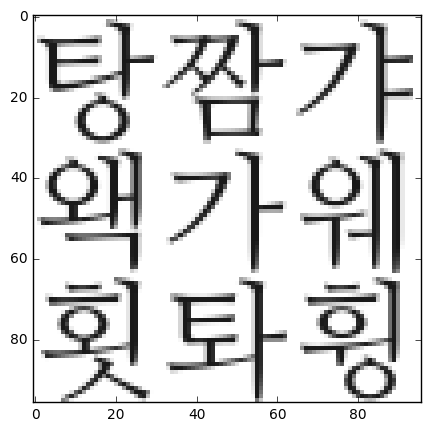

In [2]:

WIDTH, HEIGHT = 96, 96

surface = cairo.ImageSurface (cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context (surface)

ctx.set_source_rgb(0.1, 0.1, 0.1)
ctx.select_font_face("NanumMyeongjo", cairo.FONT_SLANT_NORMAL, 
        cairo.FONT_WEIGHT_NORMAL)
ctx.set_font_size(32)

target = "가"

ctx.move_to(0, 28)
ctx.show_text(get_random_ch())
ctx.move_to(32, 28)
ctx.show_text(get_random_ch())
ctx.move_to(64, 28)
ctx.show_text(get_random_ch())
ctx.move_to(0, 60)
ctx.show_text(get_random_ch())
ctx.move_to(32, 60)
ctx.show_text(target)
ctx.move_to(64, 60)
ctx.show_text(get_random_ch())
ctx.move_to(0, 92)
ctx.show_text(get_random_ch())
ctx.move_to(32, 92)
ctx.show_text(get_random_ch())
ctx.move_to(64, 92)
ctx.show_text(get_random_ch())

f = io.BytesIO()
surface.write_to_png (f)
mat = imread(f)
plt.figure(num=None, figsize=(5, 5), facecolor='w', edgecolor='k')
plt.imshow(mat, interpolation='none')

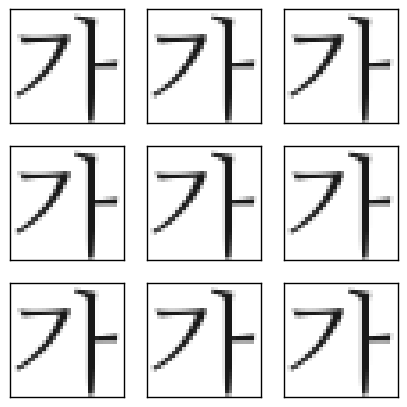

In [3]:
sliced = [mat[32:64, 32:64] for i in range(9)]

def draw_subplot(array, w, h):
    plt.figure(num=None, figsize=(5, 5), facecolor='w', edgecolor='k')
    for i in range(w*h):
        plt.subplot(w,h,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(array[i], interpolation='none')

draw_subplot(sliced, 3, 3)